## 5.2 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

### 코드5-4 훈련, 검증, 테스트 폴더로 이미지 복사하기

In [11]:
import os, shutil

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = 'C:/datasets/cats_and_dogs/train'

base_dir = 'C:/datasets/cats_and_dogs_small'
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 고양이 이미지를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 고양이 이미지를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    

# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 강아지 이미지를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 강아지 이미지를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
print ('훈련용 고양이 이미지 전체 개수:',len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [13]:
print ('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [14]:
print ('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [15]:
print ('검증용 강아지 이미지 전체 개수: ', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수:  500


In [16]:
print ('테스트용 고양이 이미지 전체 개수: ', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수:  500


In [17]:
print ('테스트용 강아지 이미지 전체 개수: ', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수:  500


### 5.2.3 네트워크 구성하기

### 코드 5-5 강아지 vs. 고양이 분류를 위한 소규모 컨브넷 만들기

In [18]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

### 코드 5-6 모델의 훈련 설정

In [20]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

### 데이터 전처리

1. 사진 파일 Read
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩
3. 부동 소수 타입의 텐서로 변환
4. 픽셀 값(0~255)의 스케일을 [0,1] 사이로 조정(신경망은 작은 입력 값을 선호)

### 코드 5-7 ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기 (이부분 잘 이해 안감)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일 조정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # 모든 이미지를 150x150 크기로 바꿈
        target_size=(150, 150),
        batch_size=20,
        # binary_corssentropy 손실을 사용하기 때문에 이진 레이블이 필요
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


### 코드 5-8 배치 제너레이터를 사용하여 모델 훈련 (이 부분 잘 이해 안감)

In [23]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 13s 126ms/step - loss: 0.6863 - acc: 0.5425 - val_loss: 0.6610 - val_acc: 0.6020
Epoch 2/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6520 - acc: 0.5990 - val_loss: 0.6370 - val_acc: 0.6410
Epoch 3/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6108 - acc: 0.6650 - val_loss: 0.6097 - val_acc: 0.6630
Epoch 4/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5750 - acc: 0.6950 - val_loss: 0.6162 - val_acc: 0.6540
Epoch 5/30
100/100 [==============================] - 5s 53ms/step - loss: 0.5420 - acc: 0.7255 - val_loss: 0.5904 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5058 - acc: 0.7535 - val_loss: 0.5662 - val_acc: 0.7050
Epoch 7/30
100/100 [==============================] - 6s 55ms/step - loss: 0.4833 - acc: 0.7700 - val_loss: 0.5487 - val_acc

In [24]:
model.save('C:/datasets/cats_and_dogs_small_1.h5')

### 코드 5-10 훈련의 정확도와 손실 그래프 그리기

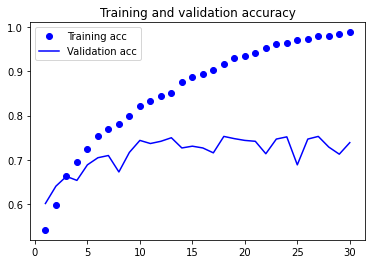

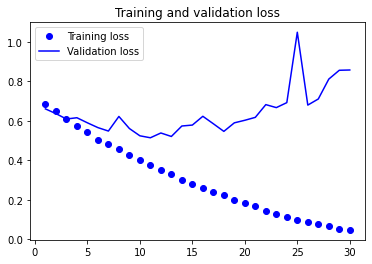

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
import tensorflow
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10364688828865561760
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1010678972486389753
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6499205120
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17701824509794611490
physical_device_desc: "device: 0, name: GeForce RTX 2080 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13220373171885124584
physical_device_desc: "device: XLA_GPU device"
]


In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1880725120230083715
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11617345098164827743
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6499205120
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5477076723158584246
physical_device_desc: "device: 0, name: GeForce RTX 2080 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13201664006728023322
physical_device_desc: "device: XLA_GPU device"
]
